<a href="https://colab.research.google.com/github/Udhay2898/Real-Fake-Job-Posting-Prediction/blob/Master/Real_Fake_Job_Posting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Sets/fake_job_postings.csv')
df.sample(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1034,1035,Customer Care Team member,"GR, E, Volos",Customer Care,9000-12000,incrediblue is busting the myth that boating i...,Incrediblue is changing the way people experie...,Must have: 2+ years of customer support experi...,"Competitive salary, depending on skills and ex...",0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Customer Service,0
3831,3832,Automotive Internet Sales Representative,"US, CA, Costa Mesa",Sales,NaN,About HitFigure:Franchised car dealers who rep...,HitFigure is going thru Explosive Growth! Now ...,Automotive Internet Sales Managers must have a...,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,0
4890,4891,Channel Manager,"US, CA, San Francisco",NaN,NaN,"Cin7 is total inventory, warehouse and point o...",Do you want to help grow a company that has de...,"You will need:Minimum of 4years of experience,...",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Exploring Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Drop the 'job_id' column
df = df.drop(columns=['job_id'])

In [6]:
df.head(1)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


In [7]:
df.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [8]:
for column in df.columns:
  unique_value = df[column].unique()
  print(f"{column} :\n {unique_value}\n")

title :
 ['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']

location :
 ['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' ...
 'US, CA, los Angeles' 'CA, , Ottawa' 'GB, WSX, Chichester']

department :
 ['Marketing' 'Success' nan ... 'Admin - Clerical' 'Administrative Dept'
 'Hospitality']

salary_range :
 [nan '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '50000-70000' '45000-60000'
 '30000-40000' '70000-90000' '10000-14000' '50-110' '28000-45000'
 '0-34300' '35000-40000' '9-Dec' '44000-57000' '18500-28000' '55000-75000'
 '30000-35000' '0-0' '20000-40000' '360000-600000' '50000-80000'
 '80000-100000' '52000-78000' '15750-15750' '40000-65000' '45000-50000'
 '

In [9]:
df.nunique()

,0
title,11231
location,3105
department,1337
salary_range,874
company_profile,1709
description,14801
requirements,11967
benefits,6204
telecommuting,2
has_company_logo,2


In [10]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [11]:
df.duplicated().sum()

281

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

,0
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64
has_company_logo,int64


In [15]:
# Making DataFrame for Categorical Columns and For Numerical Columns
# Calling object Columns
object_df = df.select_dtypes(include='object')

int_df = df.select_dtypes(include = ['int','float'])

In [16]:
object_df.sample()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
10796,General Clerk 2,"US, OK, Lawton",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",We are currently seeking General Clerk to sit ...,Required Qualifications:Have knowledge of busi...,NaN,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service


In [17]:
object_df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17599,17258,6271,2827,14317,17598,14950,10491,14171,10637,9590,12762,11236
unique,11231,3105,1337,874,1709,14801,11967,6204,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,309,718,541,141,723,376,407,723,11423,3768,5099,1711,1730


In [18]:
int_df.sample()

,telecommuting,has_company_logo,has_questions,fraudulent
2416,0,0,0,0


In [19]:
int_df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17599.000000,17599.000000,17599.000000,17599.000000
mean,0.042843,0.794136,0.492017,0.048639
std,0.202510,0.404343,0.499950,0.215119
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [20]:
# Count the occurrences of unique values in the 'fraudulent' column
df['fraudulent'].value_counts()

,count
fraudulent,
0,16743
1,856


In [21]:
# Making DataFrame for Fake Job Posting & Real Job Posting

fake = df[df['fraudulent'] == 1]

fake.head(3)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1


In [22]:
real = df[df['fraudulent'] == 0]

real.head(3)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [23]:
df.shape

(17599, 17)

In [24]:
fake.shape

(856, 17)

In [25]:
real.shape

(16743, 17)

In [26]:
# Data Visualisation
fraudulent_counts = df['fraudulent'].value_counts().reset_index()

fraudulent_counts.columns = ['fraudulent','count']

fraudulent_counts

,fraudulent,count
0,0,16743
1,1,856


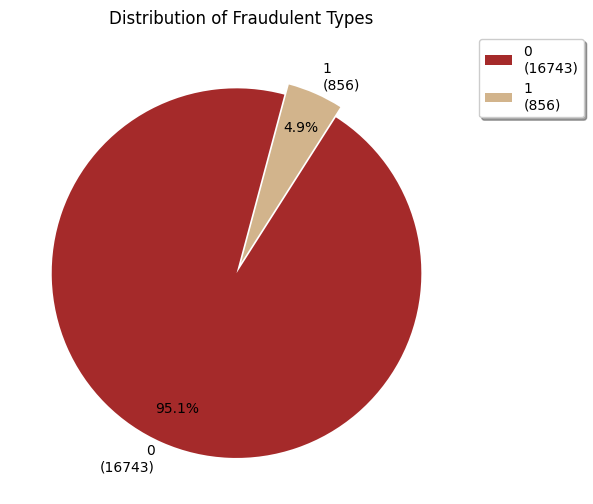

In [28]:
# Extract data for pie chart
fraudulent_values = fraudulent_counts['count']
fraudulent_labels = fraudulent_counts['fraudulent']

labels_with_counts = [f'{label}\n({count})' for label, count in zip(fraudulent_labels, fraudulent_values)]

colors = ["#A52A2A", "#D2B48C"]

plt.figure(figsize=(8, 6))
plt.pie(fraudulent_values, labels=labels_with_counts,
        autopct='%1.1f%%', startangle=75,
        colors=colors, explode=(0.06, 0),
        pctdistance=0.8)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Distribution of Fraudulent Types')

plt.show()

In [44]:
group = df.groupby(['telecommuting',
                      'has_company_logo',
                      'has_questions',
                      'required_experience',
                      'required_education',
                      'department',
                      'industry',
                      'function',
                      'location',
                      'fraudulent']).size().reset_index(name = 'count')

In [56]:
tele_group = group.pivot_table(index = 'telecommuting',columns = 'fraudulent',values = 'count',fill_value = 0)
tele_group

fraudulent,0,1
telecommuting,,
0,1.165126,1.291667
1,1.101911,1.000000


In [57]:
logo_gr = group.pivot_table(index = 'has_company_logo',columns = 'fraudulent',values = 'count',fill_value = 0)

logo_gr

fraudulent,0,1
has_company_logo,,
0,1.060976,1.020000
1,1.171977,1.362832
